In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

!pip install ipywidgets
!pip install IPython

import ipywidgets as widgets
from IPython.display import display
import seaborn as sns
import sklearn.metrics as sm


def prim_plot(y_actual,y_pred):
  pred_y_df=pd.DataFrame(
      {
          "Actual_Value":y_actual,
          "Predicted_Value":y_pred,
          "Difference":y_actual-y_pred
      }
  )


  """sns.set(rc={'figure.figsize':(12,10)})
  scatter_poly2 = sns.lmplot(
      data = pred_y_df,
      x = "Actual_Value",
      y = "Predicted_Value",
      order = 2
  )"""

  sns.regplot(x="Actual_Value", y="Predicted_Value", data=pred_y_df)


def res(y_actual,y_pred):
  print("Mean absolute error =", round(sm.mean_absolute_error(y_actual, y_pred), 2))
  print("Mean squared error =", round(sm.mean_squared_error(y_actual, y_pred), 2))
  print("Median absolute error =", round(sm.median_absolute_error(y_actual, y_pred), 2))
  print("Explain variance score =", round(sm.explained_variance_score(y_actual, y_pred), 2))
  print("R2 score =", round(sm.r2_score(y_actual, y_pred), 2))


def sub_wise_splt(df,col,flage):
  total_count = len(set(df[col]))
  subjects=sorted(set(df[col]))

  train_axis = []
  test_axis = []

  count = 0

  if str(df[col].dtypes)=='object':
    for i in subjects:
      if count <= flage:
        train_axis.append(df.query(col+" == '"+i+"'"))
      else:
        test_axis.append(df.query(col+" == '"+i+"'"))
      count+=1
  else:
    for i in subjects:
      if count <= flage:
        train_axis.append(df.query(col+" == "+str(i)))
      else:
        test_axis.append(df.query(col+" == "+str(i)))
      count+=1


  return pd.concat(train_axis, axis=0).reset_index(drop = True),pd.concat(test_axis, axis=0).reset_index(drop = True)




from sklearn.preprocessing import LabelEncoder


def encode(data):
  cls = list(data)
  encoder=LabelEncoder()
  for i in cls:
    if str(data[i].dtypes) == 'object':
      data[i]=encoder.fit_transform(data[i])

  return data


def drop_str_col(data):
  cls = list(data)
  rmv=[]
  for i in cls:
    if str(data[i].dtypes) == 'object':
      rmv.append(i)
  data = data.drop(rmv, axis=1)
  return data




def items_check_box(items):
  new_keys=[]
  for i in items:
    i=widgets.Checkbox(
      value=False,
      description=str(i),
      disabled=False,
      indent=False
      )
    display(i)
    new_keys.append(i)
  return new_keys

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score,mean_squared_error
#dataset=pd.read_csv("C:/Users/Richard/Desktop/Fitbit/Fitbit_feature_merged_version_2023.06.20 - Main file.csv")
#dataset = pd.read_csv("/content/drive/MyDrive/Cornell/MADE Lab/Wearable Project/Data/Fitbit ML/Feature merge/Feature Matrix/Fitbit_feature_merged_version_2023.06.20 - Main file.csv")
#dataset=pd.read_excel("/content/drive/MyDrive/Cornell/MADE Lab/Wearable Project/Data/Fitbit ML/Feature merge/Fitbit_feature_merged_version_2023.06.29_SPO2_wo_missing column.xlsx")
dataset = pd.read_csv("/content/drive/MyDrive/Cornell/MADE Lab/Wearable Project/Data/Fitbit ML/Feature merge/ML/Fitbit_feature_merged_version_RepeatedData_S01-S56.csv")

#dataset = pd.read_csv('/content/drive/MyDrive/Iqram Sir/Fitbit_feature_merged_version_RepeatedData_S01-S56.csv')

<ipython-input-3-4bc41e1a929b>:7: DtypeWarning: Columns (134,136,141,363,369,373,375,377,379,402,418,431,435,437,439,441,447,451) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv("/content/drive/MyDrive/Cornell/MADE Lab/Wearable Project/Data/Fitbit ML/Feature merge/ML/Fitbit_feature_merged_version_RepeatedData_S01-S56.csv")


In [ ]:
dataset.head(10)

,Subject,Condition,Activity,Epoch Duration(min),Epoch,nni_counter,nni_mean,nni_min,nni_max,hr_mean,...,poms_wound_30d,poms_wound_30d_cd,poms_hematological_30d,poms_hematological_30d_cd,poms_pain_30d,poms_pain_30d_cd,case_report_form_complete,qc_yesno,qc_date,quality_check_complete
0,018-PDT,post,Extreme,10.0,1.0,93.0,568.74,517.0,689.0,105.83,...,2.0,NaN,2.0,NaN,2.0,NaN,2.0,1.0,45071.0,2.0
1,018-PDT,post,Heavy,10.0,1.0,69.0,841.03,789.0,923.0,71.44,...,2.0,NaN,2.0,NaN,2.0,NaN,2.0,1.0,45071.0,2.0
2,018-PDT,post,Heavy,10.0,2.0,81.0,613.40,550.0,740.0,98.15,...,2.0,NaN,2.0,NaN,2.0,NaN,2.0,1.0,45071.0,2.0
3,018-PDT,post,Light,10.0,1.0,87.0,772.76,681.0,882.0,77.99,...,2.0,NaN,2.0,NaN,2.0,NaN,2.0,1.0,45071.0,2.0
4,018-PDT,post,Light,10.0,10.0,76.0,826.87,789.0,895.0,72.61,...,2.0,NaN,2.0,NaN,2.0,NaN,2.0,1.0,45071.0,2.0
5,018-PDT,post,Light,10.0,100.0,83.0,941.77,869.0,1016.0,63.77,...,2.0,NaN,2.0,NaN,2.0,NaN,2.0,1.0,45071.0,2.0
6,018-PDT,post,Light,10.0,101.0,74.0,976.01,923.0,1034.0,61.53,...,2.0,NaN,2.0,NaN,2.0,NaN,2.0,1.0,45071.0,2.0
7,018-PDT,post,Light,10.0,102.0,64.0,949.97,895.0,1000.0,63.20,...,2.0,NaN,2.0,NaN,2.0,NaN,2.0,1.0,45071.0,2.0
8,018-PDT,post,Light,10.0,103.0,79.0,873.44,789.0,1052.0,68.99,...,2.0,NaN,2.0,NaN,2.0,NaN,2.0,1.0,45071.0,2.0
9,018-PDT,post,Light,10.0,104.0,68.0,995.13,923.0,1052.0,60.36,...,2.0,NaN,2.0,NaN,2.0,NaN,2.0,1.0,45071.0,2.0


In [ ]:
#dataset[~dataset.isnull().any(axis=1)] # all rows containing non null values

In [ ]:
#dataset['Distance Walked:'].isnull().sum()

**<font color='coral'>Adding VO2_Max_6MWT</font>**

In [ ]:
#target = "VO2_Max_6MWT"

#gender_dict = {"M":1,"F":2}
loc = dataset.columns.get_loc("5_min_HR_Recovery(stdev)") + 1
dataset.insert(loc,"VO2_Max_6MWT",np.nan)
for i in range(dataset.shape[0]):
  dataset["VO2_Max_6MWT"][i] =59.44 - 3.83 * dataset['gender'][i] - 0.56*(dataset["age_years"][i]+(dataset["age_months"][i])/12) - 0.48 * dataset["bmi"][i] + 0.04*0.3048*dataset["mwt_distance"][i]
  '''
  dataset["VO2_Max_6MWT"][i] =4.948 + 0.023*0.3048*dataset["mwt_distance"][i]
  '''

<ipython-input-7-b0bf99057f43>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["VO2_Max_6MWT"][i] =59.44 - 3.83 * dataset['gender'][i] - 0.56*(dataset["age_years"][i]+(dataset["age_months"][i])/12) - 0.48 * dataset["bmi"][i] + 0.04*0.3048*dataset["mwt_distance"][i]


In [ ]:
#list(dataset.columns)

In [ ]:

last_index = dataset.columns.get_loc("VO2_Max_6MWT")+1
'''
last_index1 = dataset.columns.get_loc("quality_check_complete")+1
'''

dataset = dataset.iloc[:,:last_index]

**<font color='coral'>Null Dropping</font>**

In [ ]:
dataset = dataset.dropna(axis=1,how='all') #column elemination
dataset = dataset.reset_index(drop=True)

In [ ]:
dataset.shape

(10475, 121)

**<font color='coral'>Check Null data count per column</font>**

In [ ]:
null_cols = dataset.columns[dataset.isnull().any()].tolist()

for i in null_cols:
  print(i,":",dataset[i].isna().sum().sum())
print('Total null: ',dataset.isna().sum().sum())

dfa_alpha1 : 1181
dfa_alpha2 : 1181
VO2_Max_6MWT : 51
Total null:  2413


**<font color='coral'>Filtering: <font color='blue'>Replacing null with mean if possible. (condition on `Subject, Condition, Activity`)</font>**

In [ ]:
null_cols = dataset.columns[dataset.isnull().any()].tolist()

for current_col in null_cols:

  print(current_col)
  null_index = list(np.where(dataset[current_col].isna())[0])

  sub_con_act = []



  for i in null_index:
    if (dataset["Subject"][i],dataset["Condition"][i],dataset["Activity"][i]) not in sub_con_act:
      sub_con_act.append((dataset["Subject"][i],dataset["Condition"][i],dataset["Activity"][i]))


  for j in sub_con_act:
    temp_df = dataset.query("Condition == '"+j[1]+"' and Activity == '"+j[2]+"'  and Subject == '"+j[0]+"'")

    #calculating mean
    temp_mean = temp_df[current_col].mean()

    for i in list(temp_df.index):
      if str(dataset[current_col][i]) == 'nan':
        dataset[current_col][i] = temp_mean


**<font color='coral'>Check Null data count per column after replacing</font>**

In [ ]:
null_cols = dataset.columns[dataset.isnull().any()].tolist()

for i in null_cols:
  print(i,":",dataset[i].isna().sum().sum())
print('Total null: ',dataset.isna().sum().sum())

dfa_alpha1 : 5
dfa_alpha2 : 5
VO2_Max_6MWT : 51
Total null:  61


**removing rest of the null value**

In [ ]:
dataset.dropna(axis=0, how='any', inplace = True) #row elemination
dataset = dataset.reset_index(drop=True)

In [ ]:
dataset.shape

(10419, 121)

In [ ]:
dataset = encode(dataset)

#Custom Feature Selection

In [ ]:

all_columns = list(dataset.columns)
new_keys=items_check_box(all_columns)

Checkbox(value=False, description='Subject', indent=False)

Checkbox(value=False, description='Condition', indent=False)

Checkbox(value=False, description='Activity', indent=False)

Checkbox(value=False, description='Epoch Duration(min)', indent=False)

Checkbox(value=False, description='Epoch', indent=False)

Checkbox(value=False, description='nni_counter', indent=False)

Checkbox(value=False, description='nni_mean', indent=False)

Checkbox(value=False, description='nni_min', indent=False)

Checkbox(value=False, description='nni_max', indent=False)

Checkbox(value=False, description='hr_mean', indent=False)

Checkbox(value=False, description='hr_min', indent=False)

Checkbox(value=False, description='hr_max', indent=False)

Checkbox(value=False, description='hr_std', indent=False)

Checkbox(value=False, description='nni_diff_mean', indent=False)

Checkbox(value=False, description='nni_diff_min', indent=False)

Checkbox(value=False, description='nni_diff_max', indent=False)

Checkbox(value=False, description='sdnn', indent=False)

Checkbox(value=False, description='rmssd', indent=False)

Checkbox(value=False, description='sdsd', indent=False)

Checkbox(value=False, description='nn50', indent=False)

Checkbox(value=False, description='pnn50', indent=False)

Checkbox(value=False, description='nn20', indent=False)

Checkbox(value=False, description='pnn20', indent=False)

Checkbox(value=False, description='tinn_n', indent=False)

Checkbox(value=False, description='tinn_m', indent=False)

Checkbox(value=False, description='tinn', indent=False)

Checkbox(value=False, description='tri_index', indent=False)

Checkbox(value=False, description='fft_bands_vlf_min', indent=False)

Checkbox(value=False, description='fft_bands_vlf_max', indent=False)

Checkbox(value=False, description='fft_bands_lf_min', indent=False)

Checkbox(value=False, description='fft_bands_lf_max', indent=False)

Checkbox(value=False, description='fft_bands_hf_min', indent=False)

Checkbox(value=False, description='fft_bands_hf_max', indent=False)

Checkbox(value=False, description='fft_peak_low', indent=False)

Checkbox(value=False, description='fft_peak_medium', indent=False)

Checkbox(value=False, description='fft_peak_high', indent=False)

Checkbox(value=False, description='fft_abs_low', indent=False)

Checkbox(value=False, description='fft_abs_medium', indent=False)

Checkbox(value=False, description='fft_abs_high', indent=False)

Checkbox(value=False, description='fft_rel_low', indent=False)

Checkbox(value=False, description='fft_rel_medium', indent=False)

Checkbox(value=False, description='fft_log_low', indent=False)

Checkbox(value=False, description='fft_log_medium', indent=False)

Checkbox(value=False, description='fft_log_high', indent=False)

Checkbox(value=False, description='fft_norm_low', indent=False)

Checkbox(value=False, description='fft_norm_high', indent=False)

Checkbox(value=False, description='fft_ratio', indent=False)

Checkbox(value=False, description='fft_total', indent=False)

Checkbox(value=False, description='fft_nfft', indent=False)

Checkbox(value=False, description='fft_window', indent=False)

Checkbox(value=False, description='fft_resampling_frequency', indent=False)

Checkbox(value=False, description='fft_interpolation', indent=False)

Checkbox(value=False, description='lomb_bands_vlf_min', indent=False)

Checkbox(value=False, description='lomb_bands_vlf_max', indent=False)

Checkbox(value=False, description='lomb_bands_lf_min', indent=False)

Checkbox(value=False, description='lomb_bands_lf_max', indent=False)

Checkbox(value=False, description='lomb_bands_hf_min', indent=False)

Checkbox(value=False, description='lomb_bands_hf_max', indent=False)

Checkbox(value=False, description='lomb_peak_low', indent=False)

Checkbox(value=False, description='lomb_peak_medium', indent=False)

Checkbox(value=False, description='lomb_peak_high', indent=False)

Checkbox(value=False, description='lomb_abs_low', indent=False)

Checkbox(value=False, description='lomb_abs_medium', indent=False)

Checkbox(value=False, description='lomb_abs_high', indent=False)

Checkbox(value=False, description='lomb_rel_low', indent=False)

Checkbox(value=False, description='lomb_rel_medium', indent=False)

Checkbox(value=False, description='lomb_rel_high', indent=False)

Checkbox(value=False, description='lomb_log_low', indent=False)

Checkbox(value=False, description='lomb_log_medium', indent=False)

Checkbox(value=False, description='lomb_log_high', indent=False)

Checkbox(value=False, description='lomb_norm_high', indent=False)

Checkbox(value=False, description='lomb_norm_Low', indent=False)

Checkbox(value=False, description='lomb_ratio', indent=False)

Checkbox(value=False, description='lomb_total', indent=False)

Checkbox(value=False, description='lomb_nfft', indent=False)

Checkbox(value=False, description='ar_bands_vlf_min', indent=False)

Checkbox(value=False, description='ar_bands_vlf_max', indent=False)

Checkbox(value=False, description='ar_bands_lf_min', indent=False)

Checkbox(value=False, description='ar_bands_lf_max', indent=False)

Checkbox(value=False, description='ar_bands_hf_min', indent=False)

Checkbox(value=False, description='ar_bands_hf_max', indent=False)

Checkbox(value=False, description='ar_peak_low', indent=False)

Checkbox(value=False, description='ar_peak_medium', indent=False)

Checkbox(value=False, description='ar_peak_high', indent=False)

Checkbox(value=False, description='ar_abs_low', indent=False)

Checkbox(value=False, description='ar_abs_medium', indent=False)

Checkbox(value=False, description='ar_abs_high', indent=False)

Checkbox(value=False, description='ar_rel_low', indent=False)

Checkbox(value=False, description='ar_rel_medium', indent=False)

Checkbox(value=False, description='ar_rel_high', indent=False)

Checkbox(value=False, description='ar_log_low', indent=False)

Checkbox(value=False, description='ar_log_medium', indent=False)

Checkbox(value=False, description='ar_log_high', indent=False)

Checkbox(value=False, description='ar_norm_low', indent=False)

Checkbox(value=False, description='ar_norm_high', indent=False)

Checkbox(value=False, description='ar_ratio', indent=False)

Checkbox(value=False, description='ar_total', indent=False)

Checkbox(value=False, description='ar_nfft', indent=False)

Checkbox(value=False, description='ar_order', indent=False)

Checkbox(value=False, description='ar_resampling_frequency', indent=False)

Checkbox(value=False, description='ar_interpolation', indent=False)

Checkbox(value=False, description='sd1', indent=False)

Checkbox(value=False, description='sd2', indent=False)

Checkbox(value=False, description='sd_ratio', indent=False)

Checkbox(value=False, description='ellipse_area', indent=False)

Checkbox(value=False, description='sampen', indent=False)

Checkbox(value=False, description='dfa_alpha1', indent=False)

Checkbox(value=False, description='dfa_alpha2', indent=False)

Checkbox(value=False, description='HR_MAX(BPM)', indent=False)

Checkbox(value=False, description='aEE_MAX(kJ/min)', indent=False)

Checkbox(value=False, description='1_min_HR_Recovery(mean)', indent=False)

Checkbox(value=False, description='1_min_HR_Recovery(stdev)', indent=False)

Checkbox(value=False, description='2_min_HR_Recovery(mean)', indent=False)

Checkbox(value=False, description='2_min_HR_Recovery(stdev)', indent=False)

Checkbox(value=False, description='3_min_HR_Recovery(mean)', indent=False)

Checkbox(value=False, description='3_min_HR_Recovery(stdev)', indent=False)

Checkbox(value=False, description='4_min_HR_Recovery(mean)', indent=False)

Checkbox(value=False, description='4_min_HR_Recovery(stdev)', indent=False)

Checkbox(value=False, description='5_min_HR_Recovery(mean)', indent=False)

Checkbox(value=False, description='5_min_HR_Recovery(stdev)', indent=False)

Checkbox(value=False, description='VO2_Max_6MWT', indent=False)

In [ ]:
new_features = []
for i in range(len(new_keys)):
  if new_keys[i].value ==True:
    new_features.append(all_columns[i])

In [ ]:
y_i = widgets.RadioButtons(
    options=all_columns,
    description='Select Y:',
    disabled=False
)
y_i

RadioButtons(description='Select Y:', options=('Subject', 'Condition', 'Activity', 'Epoch Duration(min)', 'Epo…

In [ ]:
X = dataset.loc[:,new_features]
y = dataset[y_i.value]

#Feture Selection Kbest

In [ ]:
'''
from sklearn.feature_selection import SelectKBest
bestfeatures = SelectKBest(k=20)
fit = bestfeatures.fit(X,y)


dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']


number_of_feat=int(input("Number Of Best Features: "))


imp=featureScores.nlargest(number_of_feat,'Score')
print(imp)


list_of_feat=[]

for i in range(number_of_feat):
  list_of_feat.append(imp.iloc[:,0:1].values[i][0])


X_new = dataset[list_of_feat]
y_new = dataset.iloc[:, 100]
'''

'\nfrom sklearn.feature_selection import SelectKBest\nbestfeatures = SelectKBest(k=20)\nfit = bestfeatures.fit(X,y)\n\n\ndfscores = pd.DataFrame(fit.scores_)\ndfcolumns = pd.DataFrame(X.columns)\n\nfeatureScores = pd.concat([dfcolumns,dfscores],axis=1)\nfeatureScores.columns = [\'Specs\',\'Score\']\n\n\nnumber_of_feat=int(input("Number Of Best Features: "))\n\n\nimp=featureScores.nlargest(number_of_feat,\'Score\')\nprint(imp)\n\n\nlist_of_feat=[]\n\nfor i in range(number_of_feat):\n  list_of_feat.append(imp.iloc[:,0:1].values[i][0])\n\n\nX_new = dataset[list_of_feat]\ny_new = dataset.iloc[:, 100]\n'



---



---



In [ ]:
'''
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
'''

'\nfrom sklearn.model_selection import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)\n'

In [ ]:
"""
column_name = 'DASI - VO2 peak score:'
column_index = dataset.columns.get_loc(column_name)
column_index
"""

"\ncolumn_name = 'DASI - VO2 peak score:'\ncolumn_index = dataset.columns.get_loc(column_name)\ncolumn_index\n"

In [ ]:
"""X_new.shape"""

'X_new.shape'

In [ ]:
"""
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.2, random_state = 0)
"""

'\nfrom sklearn.model_selection import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.2, random_state = 0)\n'

In [ ]:
X_train = train.loc[:,new_features]
y_train = train[y_i.value]

X_test = test.loc[:,new_features]
y_test = test[y_i.value]



---



#Models

In [ ]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

#Decision Trees

In [ ]:
dtree = DecisionTreeRegressor(max_depth=3, min_samples_leaf=0.003)
dtree.fit(X_train, y_train)

pred_train= dtree.predict(X_train)
print("Trainng Result")
res(y_train,pred_train)

print()

pred_test= dtree.predict(X_test)
print("Trainng Result")
res(y_test,pred_test)

Trainng Result
Mean absolute error = 3.1
Mean squared error = 16.27
Median absolute error = 2.56
Explain variance score = 0.57
R2 score = 0.57

Trainng Result
Mean absolute error = 7.47
Mean squared error = 74.87
Median absolute error = 7.81
Explain variance score = -0.78
R2 score = -5.98


In [ ]:

"""for i in range(1,1000):
  l=i/1000
  print("------------------------------------------------------")
  dtree = DecisionTreeRegressor(max_depth=3, min_samples_leaf=l)
  dtree.fit(X_train, y_train)
  pred_test_tree= dtree.predict(X_test)
  k = r2_score(y_test, pred_test_tree)
  if k>0:
    print(k,l)"""

'for i in range(1,1000):\n  l=i/1000\n  print("------------------------------------------------------")\n  dtree = DecisionTreeRegressor(max_depth=3, min_samples_leaf=l)\n  dtree.fit(X_train, y_train)\n  pred_test_tree= dtree.predict(X_test)\n  k = r2_score(y_test, pred_test_tree)\n  if k>0:\n    print(k,l)'

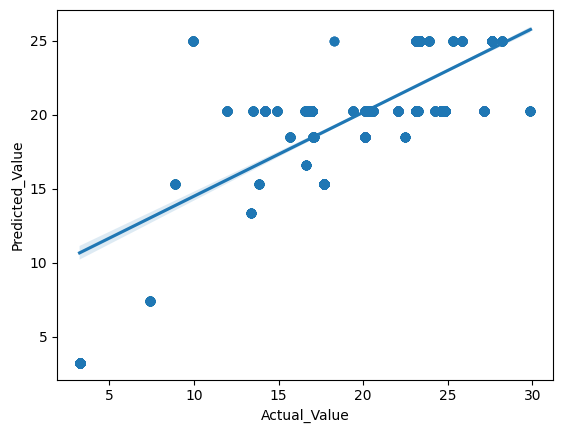

In [ ]:
prim_plot(y_train,pred_train)

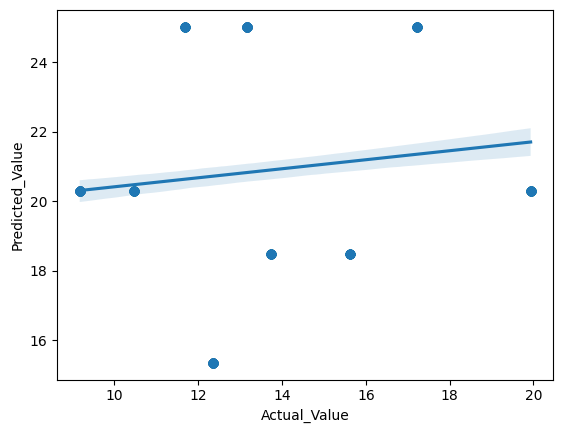

In [ ]:
prim_plot(y_test,pred_test)

#Random Forest (or Bootstrap Aggregation)

In [ ]:
#RF model
model_rf = RandomForestRegressor(n_estimators=700, oob_score=True)
model_rf.fit(X_train, y_train)

print("Training")
pred_train= model_rf.predict(X_train)
res(y_train,pred_train)

print("Testing")
pred_test = model_rf.predict(X_test)
res(y_test,pred_test)

Training
Mean absolute error = 0.0
Mean squared error = 0.0
Median absolute error = 0.0
Explain variance score = 1.0
R2 score = 1.0
Testing
Mean absolute error = 7.29
Mean squared error = 65.38
Median absolute error = 8.53
Explain variance score = -1.44
R2 score = -5.1


In [ ]:
"""
for i in range(700,3000,100):
  model_rf = RandomForestRegressor(n_estimators=i, oob_score=True, random_state=100)
  model_rf.fit(X_train, y_train)
  pred_test_rf= model_rf.predict(X_test)
  k = r2_score(y_test, pred_test_rf)
  if k>0:
    print("------------------------------------------------------")
    print(k,i)"""

'\nfor i in range(700,3000,100):\n  model_rf = RandomForestRegressor(n_estimators=i, oob_score=True, random_state=100)\n  model_rf.fit(X_train, y_train)\n  pred_test_rf= model_rf.predict(X_test)\n  k = r2_score(y_test, pred_test_rf)\n  if k>0:\n    print("------------------------------------------------------")\n    print(k,i)'

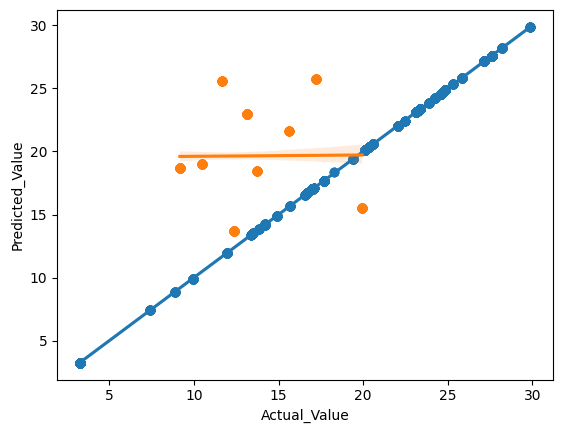

In [ ]:
prim_plot(y_train,pred_train) #[blue]
prim_plot(y_test,pred_test)   #[Yollow]

#Polynomial Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=4)
X_poly_train = poly.fit_transform(X_train)

poly.fit(X_poly_train, y_train)
lin2 = LinearRegression()
lin2.fit(X_poly_train, y_train)





print("Training")
pred_train= lin2.predict(X_poly_train)
res(y_train,pred_train)

print("Testing")
X_poly_test = poly.fit_transform(X_test)
pred_test= lin2.predict(X_poly_test)
res(y_test,pred_test)

Training
Mean absolute error = 1.26
Mean squared error = 4.95
Median absolute error = 0.5
Explain variance score = 0.87
R2 score = 0.87
Testing
Mean absolute error = 17.84
Mean squared error = 1008.89
Median absolute error = 11.35
Explain variance score = -92.18
R2 score = -93.07


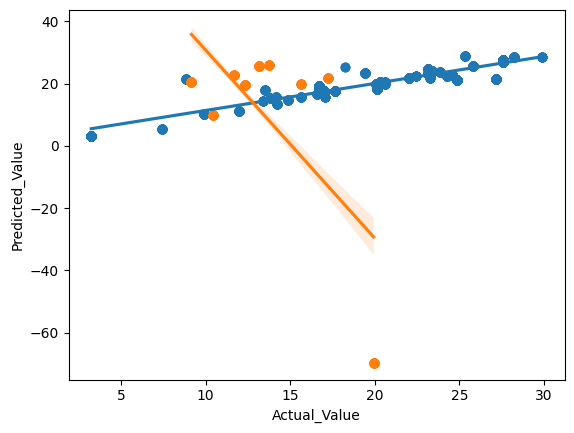

In [ ]:
prim_plot(y_train,pred_train) #[blue]
prim_plot(y_test,pred_test)   #[Yollow]

#Kernel Ridge

In [ ]:
from sklearn.kernel_ridge import KernelRidge
krr = KernelRidge(alpha=1.0)
krr.fit(X_train, y_train)


print("Training")
pred_train= krr.predict(X_train)
res(y_train,pred_train)

print("Testing")
pred_test= krr.predict(X_test)
res(y_test,pred_test)

Training
Mean absolute error = 4.04
Mean squared error = 26.82
Median absolute error = 3.34
Explain variance score = 0.29
R2 score = 0.29
Testing
Mean absolute error = 7.14
Mean squared error = 58.21
Median absolute error = 6.47
Explain variance score = -1.09
R2 score = -4.43


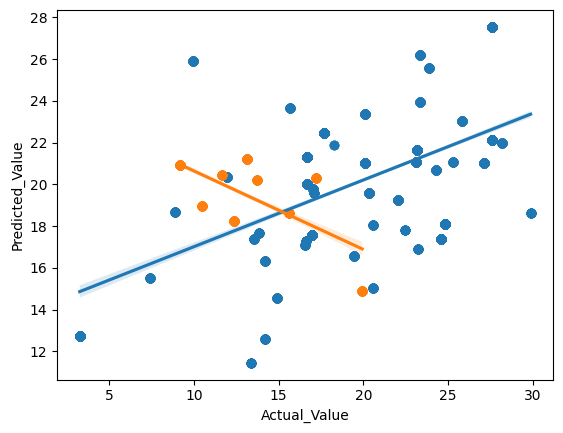

In [ ]:
prim_plot(y_train,pred_train) #[blue]
prim_plot(y_test,pred_test)   #[Yollow]

#SVM

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(X_train, y_train)

print("Training")
pred_train= regr.predict(X_train)
res(y_train,pred_train)

print("Testing")
pred_test= regr.predict(X_test)
res(y_test,pred_test)

Training
Mean absolute error = 1.72
Mean squared error = 12.09
Median absolute error = 0.2
Explain variance score = 0.68
R2 score = 0.68
Testing
Mean absolute error = 8.04
Mean squared error = 80.4
Median absolute error = 9.09
Explain variance score = -0.46
R2 score = -6.5


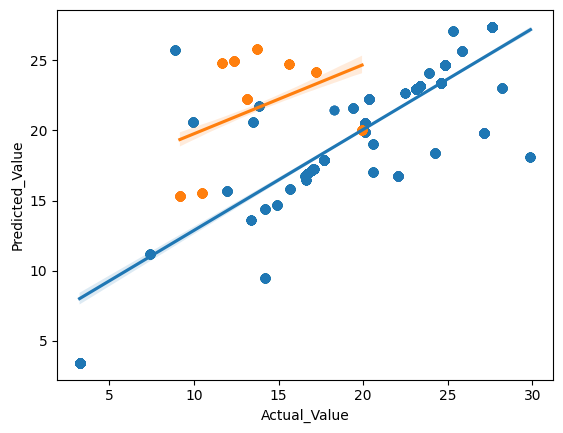

In [ ]:
prim_plot(y_train,pred_train) #[blue]
prim_plot(y_test,pred_test)   #[Yollow]

#Lasso

In [ ]:
from sklearn import linear_model
regr = linear_model.Lasso(alpha=0.1)
regr.fit(X_train, y_train)

print("Training")
pred_train= regr.predict(X_train)
res(y_train,pred_train)

print("Testing")
pred_test= regr.predict(X_test)
res(y_test,pred_test)

Training
Mean absolute error = 4.13
Mean squared error = 26.54
Median absolute error = 3.83
Explain variance score = 0.29
R2 score = 0.29
Testing
Mean absolute error = 7.06
Mean squared error = 56.73
Median absolute error = 6.86
Explain variance score = -1.01
R2 score = -4.29


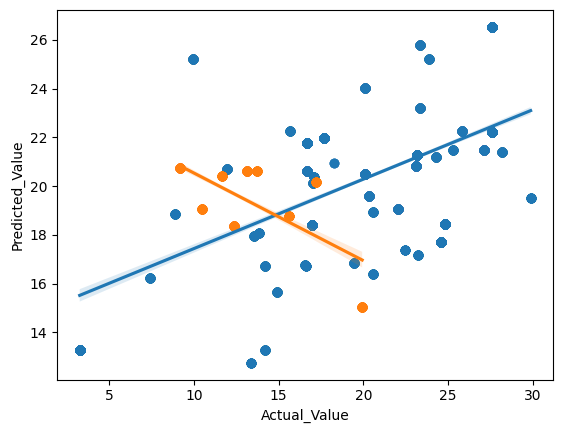

In [ ]:
prim_plot(y_train,pred_train) #[blue]
prim_plot(y_test,pred_test)   #[Yollow]

#ANN Regression

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(data=dataset,x=target,color="red",kde=True)
plt.axvline(x=dataset[target].mean(),ymax=0.55,color="green",linestyle='--',label="Mean")
plt.axvline(x=dataset[target].median(),ymax=0.56,color="purple",linestyle='--',label="Median")
plt.legend()
plt.title("ST-II Max-Min Difference")

NameError: ignored

<Figure size 800x600 with 0 Axes>

In [ ]:
plt.figure(figsize = (8,6))
sns.histplot(dataset[target],kde=True,bins=40,color="red",cumulative=True)
plt.title("Cumulative of the Target Column")

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

ann = Sequential()                          # Initializing the ANN
ann.add(Dense(units=6, activation="relu"))  #Adding First Hidden Layer
ann.add(Dense(units=6, activation="relu"))  # Adding Second Hidden Layer
ann.add(Dense(units=1))   # Adding Output Layer
#If we make a regression with neural networks, we do not need to add an activation function compared to classification problems

ann.compile(optimizer="adam",loss="mean_squared_error")
ann.fit(x=X_train, y=y_train, epochs=100, batch_size=64,validation_data=(X_test,y_test),callbacks=EarlyStopping(monitor='val_loss',patience=4))

#pd.DataFrame(ann.history.history)

plt.style.use("ggplot")
pd.DataFrame(ann.history.history).plot(figsize=(12,10))


In [ ]:
ann.evaluate(X_train,y_train)

In [ ]:
ann.evaluate(X_test,y_test)

In [ ]:
predictions = ann.predict(X_test)
predictions_df = pd.DataFrame(np.ravel(predictions),columns=["Predictions"])
comparison_df = pd.concat([pd.DataFrame(y_test,columns=["Real Values"]), predictions_df],axis=1)
comparison_df

In [ ]:
# here I will visualize the real test values(y_test) versus the predicted values.
plt.figure(figsize=(8,6))
sns.scatterplot(x = np.ravel(predictions),y = y_test)
plt.title("The Scatterplot of Relationship between Actual Values and Predictions")
plt.xlabel("Predictions")
plt.ylabel("Actual Values")
#It seems that our model predicts very well

In [ ]:
print("Training")
pred_train= ann.predict(X_train)
res(y_train,pred_train)

print("Testing")
pred_test= ann.predict(X_test)
res(y_test,pred_test)